In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import interpolate
import plotly.graph_objects as go
import pandas as pd

In [2]:
pth_el_final_coords = '0.1ptcls_per_cell_5e-13/long/final_after_2/electrons_final_coords.txt'
pth_ion_final_coords = '0.1ptcls_per_cell_5e-13/long/final_after_2/ions_final_coords.txt'

pth_el_final_vels = '0.1ptcls_per_cell_5e-13/long/final_after_2/electrons_final_vel.txt'
pth_ion_final_vels = '0.1ptcls_per_cell_5e-13/long/final_after_2/ions_final_vel.txt'

In [3]:
el_final_coords = np.genfromtxt(pth_el_final_coords)
ion_final_coords = np.genfromtxt(pth_ion_final_coords)

el_final_vels = np.genfromtxt(pth_el_final_vels)
ion_final_vels = np.genfromtxt(pth_ion_final_vels)

In [4]:
scale = 9

el_final_coords *= scale
el_final_vels *= scale
ion_final_coords *= scale
ion_final_vels *= scale

In [5]:
pth_el_final_coords = '0.1ptcls_per_cell_5e-13/long/final_after_2/electrons_final_coords'
pth_ion_final_coords = '0.1ptcls_per_cell_5e-13/long/final_after_2/ions_final_coords'

pth_el_final_vels = '0.1ptcls_per_cell_5e-13/long/final_after_2/electrons_final_vel'
pth_ion_final_vels = '0.1ptcls_per_cell_5e-13/long/final_after_2/ions_final_vel'

In [6]:
coords_e = open(pth_el_final_coords+'_SCALED_BY_' + str(scale) + '.txt', 'w')
vels_e = open(pth_el_final_vels+'_SCALED_BY_' + str(scale) + '.txt', 'w')

coords_i = open(pth_ion_final_coords+'_SCALED_BY_' + str(scale) + '.txt', 'w')
vels_i = open(pth_ion_final_vels+'_SCALED_BY_' + str(scale) + '.txt', 'w')

for i in range(len(el_final_coords)):
    coords_e.write(str(el_final_coords[i][0]) + ' ' + str(el_final_coords[i][1]) + '\n')
    vels_e.write(str(el_final_vels[i][0]) + ' ' + str(el_final_vels[i][1]) + ' ' + str(el_final_vels[i][2]) + '\n')
for i in range(len(ion_final_coords)):
    coords_i.write(str(ion_final_coords[i][0]) + ' ' + str(ion_final_coords[i][1]) + '\n')
    vels_i.write(str(ion_final_vels[i][0]) + ' ' + str(ion_final_vels[i][1]) + ' ' + str(ion_final_vels[i][2]) + '\n')

In [7]:
pth_diel_e = '0.1ptcls_per_cell_5e-13/long/final_after_2/diel_el_rho.txt'
pth_diel_i = '0.1ptcls_per_cell_5e-13/long/final_after_2/diel_ion_rho.txt'

diel_e = np.genfromtxt(pth_diel_e)
diel_i = np.genfromtxt(pth_diel_i)

(100, 50)
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.730619   -0.798559   -0.363315   -0.172556   -0.0948967
 -0.0638005  -0.046332   -0.0404531  -0.0403592  -0.0359838  -0.0284126
 -0.0281541  -0.0326575  -0.0311216  -0.0261867  -0.0240441  -0.0238466
 -0.0221981  -0.019768   -0.0163196  -0.0136397  -0.00890951 -0.00539655
 -0.0313602  -0.11706   ]


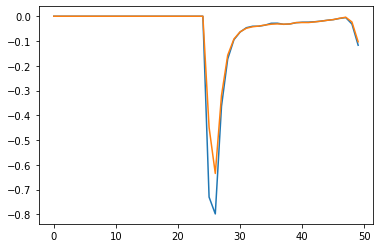

In [8]:
print(diel_e.shape)
plt.plot(diel_e[2])
plt.plot(diel_e[98])

print(diel_e[2])

In [9]:
Nr = 50
Nz = 100
new_val_e_left = np.zeros(Nr * int(scale**.5))
new_val_e_right = np.zeros(Nr * int(scale**.5))

for i in range(Nr * int(scale**.5)):
    if (i < Nr * scale**.5 / 2):
        new_val_e_left[i] = 0
        new_val_e_right[i] = 0
    else:
        if (i % 2 == 0):
            new_val_e_left[i] = 0
            new_val_e_right[i] = 0
        else:
            new_val_e_left[i] = diel_e[2][int(i/3)]
            new_val_e_right[i] = diel_e[Nz - 2][int(i/3)]
            
for i in range(Nr * int(scale**.5 / 2), Nr * int(scale**.5) - 1):
    if new_val_e_left[i] == 0:
        new_val_e_left[i] = (new_val_e_left[i - 1] + new_val_e_left[i + 1]) / 3
        new_val_e_right[i] = (new_val_e_right[i - 1] + new_val_e_right[i + 1]) / 3
for i in range(Nr * int(scale**.5 / 2), Nr * int(scale**.5) - 1):
    if i % 2 != 0:
        new_val_e_left[i] /= 1.5
        new_val_e_right[i] /= 1.5
print(new_val_e_right)


[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.14969133 -0.29938267 -0.29938267 -0.29938267
 -0.361371   -0.42335933 -0.31823367 -0.213108   -0.213108   -0.213108
 -0.15898467 -0.10486133 -0.08314197 -0.0614226  -0.0614226  -0.0614226
 -0.

In [10]:
new_val_i_left = np.zeros(Nr * int(scale**.5))
new_val_i_right = np.zeros(Nr * int(scale**.5))

for i in range(Nr * int(scale**.5) ):
    if (i < Nr * scale**.5 / 2):
        new_val_i_left[i] = 0
        new_val_i_right[i] = 0
    else:
        if (i % 2 == 0):
            new_val_i_left[i] = 0
            new_val_i_right[i] = 0
        else:
            new_val_i_left[i] = diel_i[2][int(i/3)]
            new_val_i_right[i] = diel_i[Nz - 2][int(i/3)]
            
for i in range(Nr * int(scale**.5 / 2), Nr * int(scale**.5) - 1):
    if new_val_i_left[i] == 0:
        new_val_i_left[i] = (new_val_i_left[i - 1] + new_val_i_left[i + 1]) / 3
        new_val_i_right[i] = (new_val_i_right[i - 1] + new_val_i_right[i + 1]) / 3
for i in range(Nr * int(scale**.5 / 2), Nr * int(scale**.5) - 1):
    if i % 2 != 0:
        new_val_i_left[i] /= 1.5
        new_val_i_right[i] /= 1.5
print(new_val_i_right)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [11]:
x = np.arange(0, Nr * int(scale ** .5))
i_left = interpolate.make_interp_spline(x, new_val_i_left)
i_right = interpolate.make_interp_spline(x, new_val_i_right)

e_left = interpolate.make_interp_spline(x, new_val_e_left)
e_right = interpolate.make_interp_spline(x, new_val_e_right)

In [12]:
pth_diel_e = '0.1ptcls_per_cell_5e-13/long/final_after_2/diel_el_rho'
pth_diel_i = '0.1ptcls_per_cell_5e-13/long/final_after_2/diel_ion_rho'

new_diel_e = open(pth_diel_e + '_SCALED_BY_' + str(scale) + '.txt', 'w')
new_diel_i = open(pth_diel_i + '_SCALED_BY_' + str(scale) + '.txt', 'w')

(100, 50)


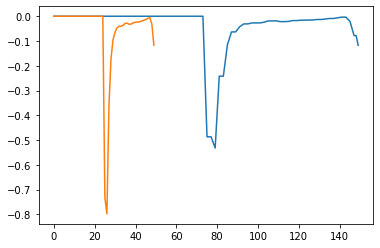

In [13]:
print(diel_e.shape)
plt.plot(e_left(x))
plt.plot(diel_e[2])


In [14]:
for i in range(Nz * scale):
    if i == 2:
        for j in range(len(new_val_e_left)):
            new_diel_e.write(str(new_val_e_left[j]) + ' ')
            new_diel_i.write(str(new_val_i_left[j]) + ' ')
        new_diel_e.write('\n')
        new_diel_i.write('\n')
    elif i == Nz * int(scale**.5) - 2:
        for j in range(len(new_val_e_left)):
            new_diel_e.write(str(new_val_e_right[j]) + ' ')
            new_diel_i.write(str(new_val_i_right[j]) + ' ')
        new_diel_e.write('\n')
        new_diel_i.write('\n')
    else:
        for j in range(len(new_val_e_left)):
            new_diel_e.write(str(0) + ' ')
            new_diel_i.write(str(0) + ' ')
        new_diel_e.write('\n')
        new_diel_i.write('\n')
        
        

In [35]:
pth_old_pot = '0.1ptcls_per_cell_5e-13/long/2/potential_.txt'
old_pot = np.genfromtxt(pth_old_pot)
print(old_pot[0])

[-700.    -700.    -700.    -700.    -700.    -700.    -700.    -700.
 -700.    -700.    -700.    -700.    -700.    -700.    -700.    -700.
 -700.    -700.    -700.    -700.    -700.    -700.    -700.    -700.
 -700.    -685.637 -675.451 -668.045 -659.488 -648.998 -635.712 -621.13
 -605.197 -586.484 -568.892 -552.592 -536.322 -519.741 -504.892 -490.86
 -478.869 -464.686 -452.782 -440.294 -427.603 -415.061 -402.984 -392.285
 -324.291    0.   ]


In [45]:
new_Nz = Nz * int(scale**.5)
new_Nr = Nr * int(scale**.5)
new_pot = np.ones((new_Nz, new_Nr))

for i in range(Nz * int(scale**.5)):
    for j in range(Nr * int(scale**.5)):
        if i % 2 == 0 and j % 2 != 0:
            new_pot[i][j] = old_pot[int(i / int(scale ** .5))][int(j / int(scale ** .5))]
        elif i % 2 != 0 and j % 2 == 0:
            new_pot[i][j] = old_pot[int(i / int(scale ** .5))][int(j / int(scale ** .5))]
for i in range(Nz * int(scale**.5)):
    for j in range(Nr * int(scale**.5)):
        if new_pot[i][j] == 1:
            new_pot[i][j] = None
x = np.linspace(0, Nz * int(scale ** .5), Nz)
y = np.linspace(0, Nr * int(scale ** .5), Nr)

f = interpolate.RectBivariateSpline(x, y, old_pot, kx=2, ky=5, s =1000000)

x1 = np.linspace(0, Nz * int(scale ** .5), Nz * int(scale ** .5))
x2 = np.linspace(0, Nr * int(scale ** .5), Nr * int(scale ** .5))

new_pot = f(x1, x2)
new_pot[:, -1] = 0
print(new_pot.shape)

(300, 150)


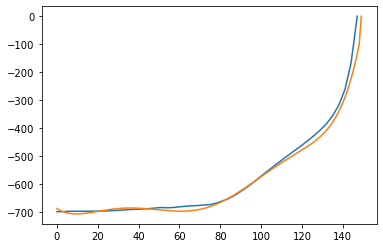

In [49]:
plt.plot([i for i in range(0, Nr * int(scale ** .5), int(scale ** .5))],old_pot[4])
plt.plot(new_pot[4])

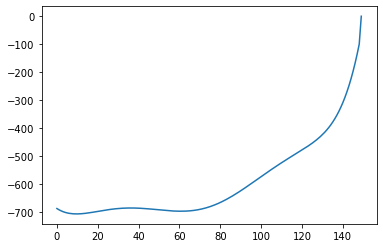

In [50]:
plt.plot(new_pot[4])

In [51]:
pth_old_pot = '0.1ptcls_per_cell_5e-13/long/2/potential_'

potential = open(pth_old_pot + '_SCALED_BY_' + str(scale) + '.txt', 'w')

for i in range(len(new_pot)):
    for j in range(len(new_pot[0])):
        potential.write(str(new_pot[i][j]) + ' ')
    potential.write('\n')